Member of Group 5
1. Ahmad Novan Alfian
2. Nirmala
3. Moch Isna Ardian Cahyana
4. Renata Sayidatul Arikha

# Data Profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleansing

In [5]:
# Data Duplicates Checking
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().value_counts()

False    87396
dtype: int64

In [8]:
# Missing Value Checking
df.isnull(). sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [9]:
percent_null = (df.isnull().sum() / len(df)) * 100
print(percent_null)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

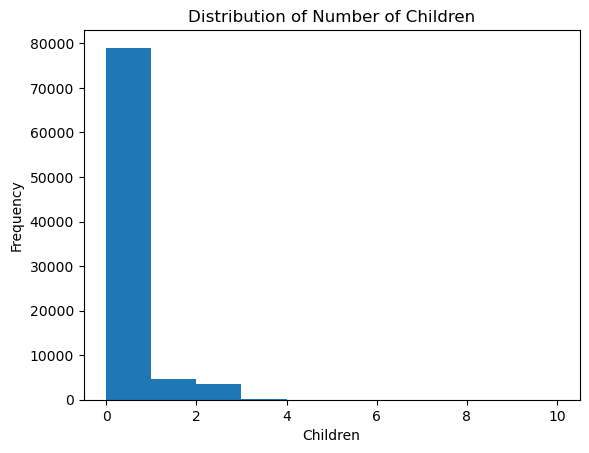

In [11]:
# Missing Value Handling - Children Column
df.children.plot(kind='hist');
plt.title('Distribution of Number of Children')
plt.xlabel('Children')
plt.show()

In [13]:
val = df.children.median()
df['children'] = df.children.fillna(val)

In [14]:
df['children'].info()

<class 'pandas.core.series.Series'>
Int64Index: 87396 entries, 0 to 119389
Series name: children
Non-Null Count  Dtype  
--------------  -----  
87396 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [15]:
# Missing Value Handling - Country Column
df['country'].info()

<class 'pandas.core.series.Series'>
Int64Index: 87396 entries, 0 to 119389
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
86944 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [16]:
df.country.value_counts()

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [17]:
val = df.country.mode().values[0]
df['country'] = df.country.fillna(val)

In [18]:
df['country'].info()

<class 'pandas.core.series.Series'>
Int64Index: 87396 entries, 0 to 119389
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
87396 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [19]:
# Missing Value Handling - Agent Column
df['agent'].info()

<class 'pandas.core.series.Series'>
Int64Index: 87396 entries, 0 to 119389
Series name: agent
Non-Null Count  Dtype  
--------------  -----  
75203 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [20]:
df.agent.value_counts()

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: agent, Length: 333, dtype: int64

In [21]:
val = df.agent.mode().values[0]
df['agent'] = df.agent.fillna(val)

In [22]:
df['agent'].info()

<class 'pandas.core.series.Series'>
Int64Index: 87396 entries, 0 to 119389
Series name: agent
Non-Null Count  Dtype  
--------------  -----  
87396 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [23]:
# Missing Value Handling - Company Column
df['company'].isnull().sum() / len(df) * 100

93.98256213098998

In [24]:
df.drop('company', axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [26]:
df.isnull(). sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# Data Vizualization and Storytelling

In [27]:
df.arrival_date_year[df['hotel']=='Resort Hotel'].value_counts()

2016    15632
2017    11573
2015     6763
Name: arrival_date_year, dtype: int64

In [28]:
df.arrival_date_year[df['hotel']=='City Hotel'].value_counts()

2016    26759
2017    20119
2015     6550
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'Number of Hotel Customers in 2015-2017')

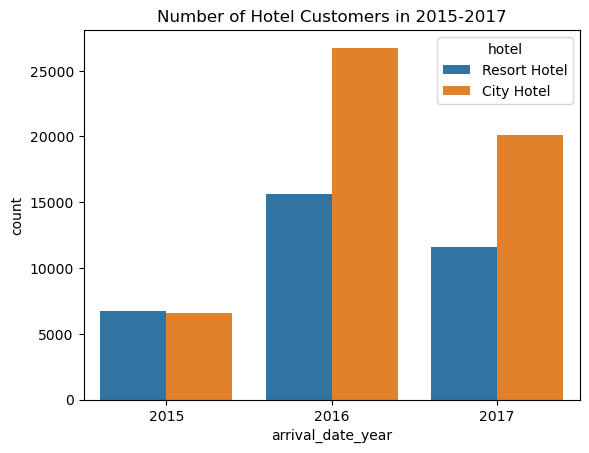

In [29]:
sns.countplot(x='arrival_date_year', hue='hotel',  data=df);
plt.title('Number of Hotel Customers in 2015-2017')

From this chart it can be seen that there was more than double bookings were made in 2016, compared to the previous year, but decrease in the number of visitors coming from 2016 to 2017 for each hotel. There was a decrease of around 42.5% in Resort Hotels compared to the previous year, while in City Hotels there was a decrease of around 42.9% from the previous year. This decline figure almost touched half of the previous year's income. Therefore, hotels need to make efforts to increase the number of visitors in the following year, for example by providing attractive discounts and promotions.

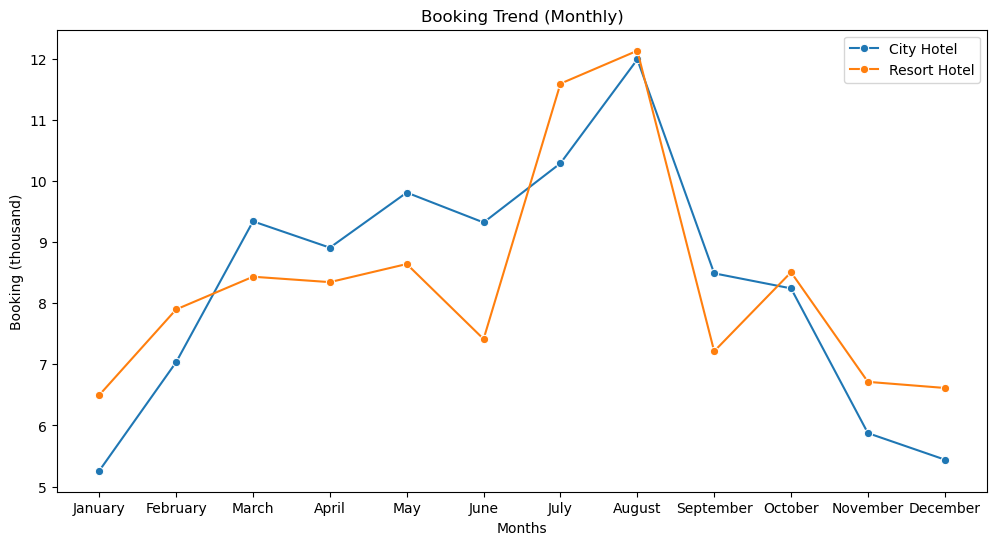

In [30]:
df = df[df['is_canceled'] == 0]

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots()

city_hotel = df.loc[df['hotel'] == 'City Hotel', 'arrival_date_month']
city_counts = city_hotel.value_counts().reindex(new_order)

x1 = city_counts.index
y1 = city_counts / city_counts.sum() * 100

resort_hotel = df.loc[df['hotel'] == 'Resort Hotel', 'arrival_date_month']
resort_counts = resort_hotel.value_counts().reindex(new_order)

x2 = resort_counts.index
y2 = resort_counts / resort_counts.sum() * 100

plt.title('Booking Trend (Monthly)')
plt.xlabel('Months')
plt.ylabel('Booking (thousand)')

plt.gcf().set_size_inches(12, 6)
sns.lineplot(x = x1, y = y1.values, label='City Hotel', sort=False, ax=ax, marker = 'o')
sns.lineplot(x = x2, y = y2.values, label='Resort Hotel', sort=False, ax=ax, marker = 'o')
plt.show()

From this chart, there is a difference in the number of visitors to City Hotels and Resort Hotels. It can be seen that the number of visitors at City Hotels is more and stable than Resort Hotels. At the beginning of the year (January - February), mid-year (July - August), and end of the year (October - November) more people choose Resort Hotels, while in other months, customers tend to choose City Hotels. This pattern shows that resort hotels will be busier during the holiday season, while city hotels tend to be stable because they are usually used during the active months. This is important to know so that hotels can make better strategies to increase the number of customers and make sales more stable without being affected by any season.

<Axes: ylabel='hotel'>

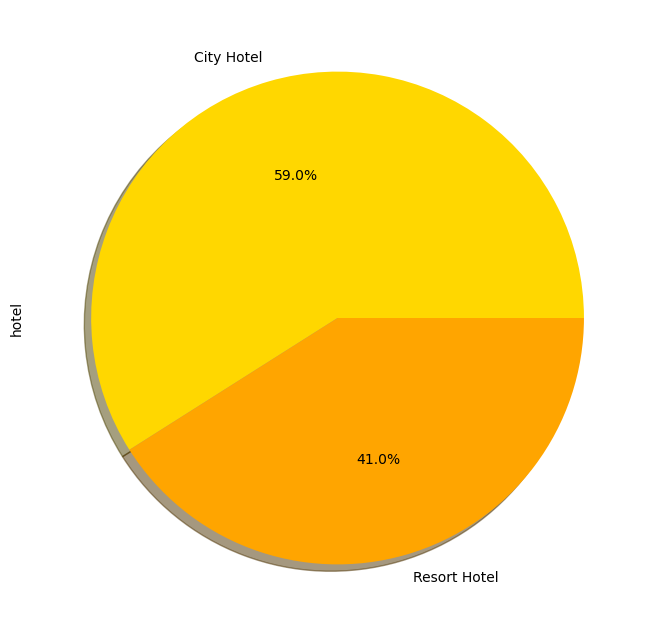

In [32]:
plt.figure(figsize=(15, 8))
cols = ['gold', 'orange']
df['hotel'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

Based on data, it can be seen that there are 2 types of hotels, namely city hotels and resort hotels and from all visitors it can be seen that more people choose to stay at city hotels at 61% of all visitors and for resort hotels themselves there are 39% of all visitors who choose to stay at there.

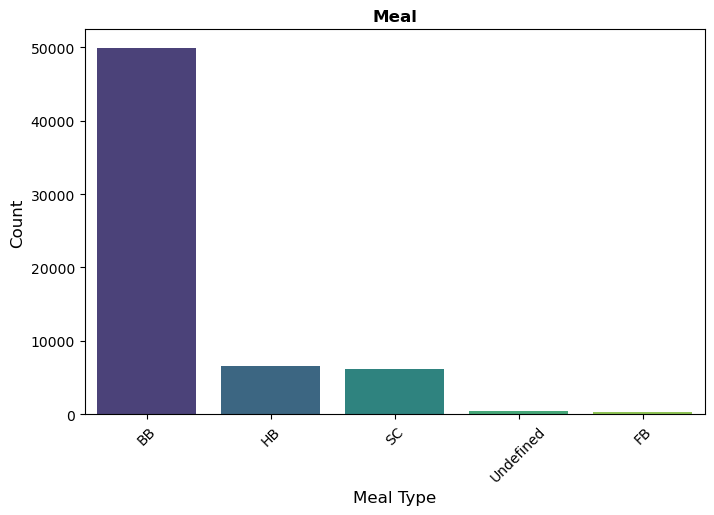

In [31]:
meal_counts = df['meal'].value_counts()
meal_counts = meal_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 5))

ax = sns.countplot(x='meal', data=df, order=meal_counts.index, palette='viridis')
ax.set_title('Meal', weight='bold')

plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.show()

Based on data, 77% of visitors ordered BB (Bed & Breakfast) meals, while 10% of visitors ordered SC (Self-Catering) or HB (Half board (breakfast and one other meal – usually dinner)), the rest ordered full board, and there were visitors who did not order food. 

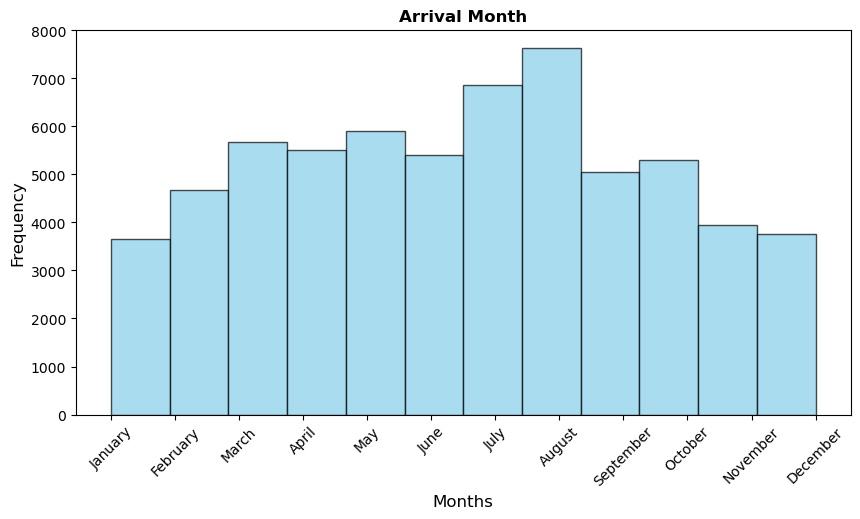

In [33]:
months = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['Month'] = df['arrival_date_month'].map(months)

plt.figure(figsize=(10, 5))
plt.hist(df['Month'], bins=12, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Arrival Month', weight='bold')
plt.xticks(range(1, 13), months.keys(), rotation=45)
plt.show()

From this chart, there was a trend of decreasing number of customers at the beginning and end of the year. However, there was a spike in the number of customers from June to August amounting to 44.97% from June to August, but decreased in the following months. Therefore, efforts are needed to increase the number of visits, such as promotions new year or end year sell, as well as providing more rooms between June and August with good facilities and services to maintain customer loyalty so that there is no decline. which was quite extreme in the following month.